# Dataset & Summary Statistics

First, write functions that create the dataset for analysis and visualizations.

In [33]:
import subprocess
import os
import pandas as pd
import numpy as np
import matplotlib as mplib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [34]:
# Create dataset 
fname = r'C:\Users\15853\Desktop\repos\gorman-earlyjobskill-analysis\data\output\original.pkl'
fname2 = r'C:\Users\15853\Desktop\repos\gorman-earlyjobskill-analysis\data\input\TNFI_TRUNC_79.csv'
if not os.path.exists(fname):
    cwd = os.getcwd()
    os.chdir('../../data/')
    subprocess.check_call('./create_data')
    os.chdir(cwd)

In [35]:
OBS_DATASET = pd.read_pickle(fname)
SURVEY_YEARS = OBS_DATASET['SURVEY_YEAR'].unique()
TNFI_79 = pd.read_csv(fname2)
TNFI_79['SURVEY_YEAR'] = 1978
OBS_DATASET = pd.merge(OBS_DATASET, TNFI_79, how='left', left_on=['IDENTIFIER', 'SURVEY_YEAR'],
                       right_on=['IDENTIFIER', 'SURVEY_YEAR'])

In [36]:
# This function returns the observed dataset.
def get_dataset():

    # Add a crude measure on an individual's age. This is not the most accurate as the times
    # of the interview are spread all over the year.
    OBS_DATASET['AGE'] = OBS_DATASET['SURVEY_YEAR'] - OBS_DATASET['YEAR_OF_BIRTH']
    
    # Construct a variable for family income quartile
    trunc_data = OBS_DATASET.loc[OBS_DATASET['SURVEY_YEAR'] == 1978, ['TNFI_TRUNC']].dropna()
    first_q = np.percentile(trunc_data, 25)
    second_q = np.percentile(trunc_data, 50)
    third_q = np.percentile(trunc_data, 75)

    OBS_DATASET['FAMILY_INCOME_QUARTILE'] = np.nan

    def func(x):
        if 'NaN' != x < first_q:
            return 'first quartile'
        elif first_q <= x < second_q:
            return 'second quartile'
        elif second_q <= x < third_q:
            return 'third quartile'
        elif third_q <= x != 'NaN':
            return 'fourth quartile'

    OBS_DATASET['FAMILY_INCOME_QUARTILE'] = OBS_DATASET['TNFI_TRUNC'].apply(func)

    return OBS_DATASET

In [47]:
# View the dataset by the first survey respondent in each year. 
df = pd.read_pickle(fname)
SURVEY_YEAR = df['SURVEY_YEAR'].unique()
df.head(5)

IDENTIFIER  SURVEY_YEAR  RACE  SAMPLE_ID  GENDER  \
Identifier Survey Year                                                     
1          1978                  1         1978     3        5.0       2   
           1979                  1         1979     3        5.0       2   
           1980                  1         1980     3        5.0       2   
           1981                  1         1981     3        5.0       2   
           1982                  1         1982     3        5.0       2   

                        ROTTER_SCORE  ROTTER_1  ROTTER_2  ROTTER_3  ROTTER_4  \
Identifier Survey Year                                                         
1          1978                 11.0       2.0       2.0       2.0       2.0   
           1979                 11.0       2.0       2.0       2.0       2.0   
           1980                 11.0       2.0       2.0       2.0       2.0   
           1981                 11.0       2.0       2.0       2.0       2.0   
           1982                 11.0       2.0       2.0       2.0       2.0   

                        ...  ENROLLED_SCHOOL_OCTOBER  \
Identifier Survey Year  ...                            
1          1978         ...                      NaN   
           1979         ...                      NaN   
           1980         ...                      NaN   
           1981         ...                      NaN   
           1982         ...                      NaN   

                        ENROLLED_SCHOOL_NOVEMBER  ENROLLED_SCHOOL_DECEMBER  \
Identifier Survey Year                                                       
1          1978                              NaN                       NaN   
           1979                              NaN                       NaN   
           1980                              NaN                       NaN   
           1981                              NaN                       NaN   
           1982                              NaN                       NaN   

                        HIGHEST_DEGREE_RECEIVED  OCCALL70_MOD_JOB_1  \
Identifier Survey Year                                                
1          1978                             NaN                 NaN   
           1979                             NaN               325.0   
           1980                             NaN                 NaN   
           1981                             NaN               305.0   
           1982                             NaN                 NaN   

                        OCCALL70_MOD_JOB_2  OCCALL70_MOD_JOB_3  \
Identifier Survey Year                                           
1          1978                        NaN                 NaN   
           1979                        NaN                 NaN   
           1980                        NaN                 NaN   
           1981                        NaN                 NaN   
           1982                        NaN                 NaN   

                        OCCALL70_MOD_JOB_4  OCCALL70_MOD_JOB_5  IS_INTERVIEWED  
Identifier Survey Year                                                          
1          1978                        NaN                 NaN            True  
           1979                        NaN                 NaN            True  
           1980                        NaN                 NaN           False  
           1981                        NaN                 NaN            True  
           1982                        NaN                 NaN           False  

[5 rows x 116 columns]

In [52]:
# Show all variables 
list(df.columns)

['IDENTIFIER',
 'SURVEY_YEAR',
 'RACE',
 'SAMPLE_ID',
 'GENDER',
 'ROTTER_SCORE',
 'ROTTER_1',
 'ROTTER_2',
 'ROTTER_3',
 'ROTTER_4',
 'ROSENBERG_SCORE',
 'ROSENBERG_1',
 'ROSENBERG_2',
 'ROSENBERG_3',
 'ROSENBERG_4',
 'ROSENBERG_5',
 'ROSENBERG_6',
 'ROSENBERG_7',
 'ROSENBERG_8',
 'ROSENBERG_9',
 'ROSENBERG_10',
 'ASVAB_ARITHMETIC_REASONING',
 'ASVAB_WORD_KNOWLEDGE',
 'ASVAB_PARAGRAPH_COMPREHENSION',
 'ASVAB_NUMERICAL_OPERATIONS',
 'ASVAB_ALTERED_TESTING',
 'AFQT_1',
 'HIGHEST_GRADE_COMPLETED_FATHER',
 'HIGHEST_GRADE_COMPLETED_MOTHER',
 'ENROLLED_SCHOOL_JANUARY_1',
 'ENROLLED_SCHOOL_FEBRUARY_1',
 'ENROLLED_SCHOOL_MARCH_1',
 'ENROLLED_SCHOOL_APRIL_1',
 'ENROLLED_SCHOOL_MAY_1',
 'ENROLLED_SCHOOL_JUNE_1',
 'ENROLLED_SCHOOL_JULY_1',
 'ENROLLED_SCHOOL_AUGUST_1',
 'ENROLLED_SCHOOL_SEPTEMBER_1',
 'ENROLLED_SCHOOL_OCTOBER_1',
 'ENROLLED_SCHOOL_NOVEMBER_1',
 'ENROLLED_SCHOOL_DECEMBER_1',
 'ENROLLED_SCHOOL_JANUARY_2',
 'ENROLLED_SCHOOL_FEBRUARY_2',
 'ENROLLED_SCHOOL_MARCH_2',
 'ENROLLED_SCHOOL_

Next, write a function for nice / uniform formatting across plots.

In [41]:
def set_formatter(ax):
    formatter = mplib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    ax.get_yaxis().set_major_formatter(formatter)

In [42]:
# View the number of observations in the survey over time
num_obs = []
for year in SURVEY_YEARS:
    cond = df.loc[df['SURVEY_YEAR'] == year, 'IS_INTERVIEWED'].isin([True])
    num_obs += [df.loc[df['SURVEY_YEAR'] == year, 'IDENTIFIER'][cond].count()]

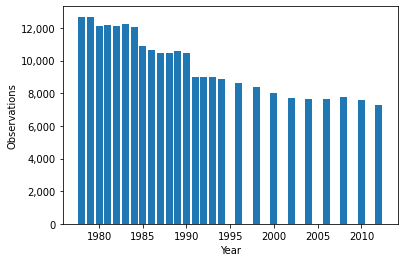

In [43]:
ax = plt.figure().add_subplot(111)
set_formatter(ax)

ax.bar(df['SURVEY_YEAR'].unique(), num_obs)

ax.set_ylabel('Observations')
ax.set_xlabel('Year')

plt.savefig('fig-dataset-basic-observations.png')

* The NLSY79 is a nationally representative sample of 12,686 individuals first surveyed in 1979 between the ages of 14 and 22. It makes sense that the sample would get smaller over the course of time as people drop out, stop responding, die, etc. In 1994, the survey was moved to be administered every other year, which is visually represented in the bars spaced further out after that time.  

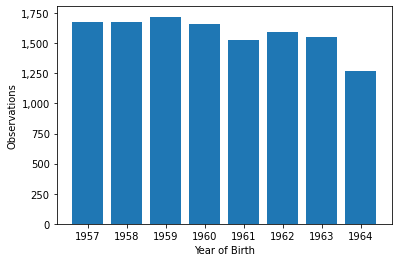

In [44]:
# Plot the years of birth among the sample; removing years of birth with a very small
# number of individuals for clarity of the visualization 
dat = df.loc[df['SURVEY_YEAR'] == 1978, 'YEAR_OF_BIRTH']
dat = dat.value_counts().to_dict()

for year in [1955, 1956, 1965]:
    del dat[year]

ax = plt.figure().add_subplot(111)
set_formatter(ax)

ax.set_ylabel('Observations')
ax.set_xlabel('Year of Birth')

ax.bar(dat.keys(), dat.values())

plt.savefig('fig-dataset-basic-birth.png')

* The sample is well distributed across ages initially interviewed between 14 and 22, with fewer of the youngest individuals. 

In [66]:
# View the number of respondents in the labor force over time 

In [67]:
emp_stat = df.loc[df['SURVEY_YEAR'] == 1978, 'EMP_STATUS_WK_1'].unique()
emp_stat

array([ 102.,    5.,    0.,  104.,  101.,    4.,  103.,    2.,  105.,
          3.,  108.,  110.,    7.,  107.,  109., 1801.,  201., 1901.])